<a href="https://colab.research.google.com/github/kruho/colab/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTデータをダウンロードする

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 10s 1us/step


In [2]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

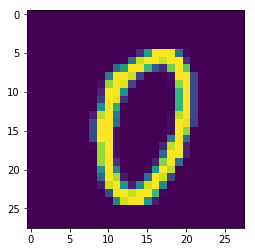

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1000])

# データの前処理

In [4]:
x_train.min(), x_train.max()

(0, 255)

In [0]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [0]:
x_train = x_train.reshape((60000,28,28,1))

In [0]:
x_test = x_test.reshape((10000,28,28,1))

In [0]:
x_input_train = x_train[:50000]
x_output_train = x_train[:50000]

x_input_val = x_train[50000:]
x_output_val = x_train[50000:]

x_input_test = x_test
x_output_test = x_test

In [0]:
import numpy as np

#x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 0.5
#x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 0.5
#x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 0.5

x_input_train = x_input_train + np.random.random(size=x_input_train.shape) * 5.
x_input_val = x_input_val + np.random.random(size=x_input_val.shape) * 5.
x_input_test = x_input_test + np.random.random(size=x_input_test.shape) * 5.

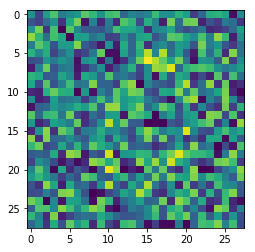

In [11]:
plt.imshow(x_input_train[1000].squeeze())

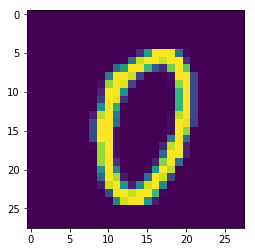

In [12]:
plt.imshow(x_output_train[1000].squeeze())

# ニューラルネットを作る

In [0]:
from keras.layers import Input, BatchNormalization, Activation, Conv2D, UpSampling2D

In [0]:
input_tensor = Input((28,28,1))

In [15]:
if False:
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(16, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)
  
if True:
  nb_ch = 32
  
  h = Activation('relu')(input_tensor)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)
  
  nb_ch *= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same', strides=2)(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = UpSampling2D()(h)
  nb_ch //= 2

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(nb_ch, (3,3), padding='same')(h)

  h = Activation('relu')(h)
  h = BatchNormalization()(h)
  h = Conv2D(1, (3,3), padding='same')(h)

  output_tensor = Activation('sigmoid')(h)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras.models import Model

auto_encoder = Model(input_tensor, output_tensor)

In [0]:
auto_encoder.compile(loss='mse', optimizer='adam')

In [18]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
__________

# 訓練する

In [19]:
hist = auto_encoder.fit(
    x = x_input_train,
    y = x_output_train,
    epochs = 20,
    batch_size=100,
    validation_data = (x_input_val, x_output_val),
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 344us/step - loss: 0.0345 - val_loss: 0.0258
Epoch 2/20
50000/50000 [==============================] - 14s 284us/step - loss: 0.0244 - val_loss: 0.0247
Epoch 3/20
50000/50000 [==============================] - 14s 276us/step - loss: 0.0235 - val_loss: 0.0231
Epoch 4/20
50000/50000 [==============================] - 14s 274us/step - loss: 0.0230 - val_loss: 0.0230
Epoch 5/20
50000/50000 [==============================] - 14s 276us/step - loss: 0.0227 - val_loss: 0.0230
Epoch 6/20
50000/50000 [==============================] - 14s 274us/step - loss: 0.0225 - val_loss: 0.0224
Epoch 7/20
50000/50000 [==============================] - 14s 287us/step - loss: 0.0223 - val_loss: 0.0226
Epoch 8/20
50000/50000 [==============================] - 14s 281us/step - loss: 0.0221 - val_loss: 0.0225
Epoch 9/20
50000/50000 [======================

In [20]:
hist.history

{'loss': [0.03448050152361393,
  0.02443439759016037,
  0.02353264403820038,
  0.023004140379428863,
  0.02270786637544632,
  0.022454192712306975,
  0.02228545601904392,
  0.022104787316322327,
  0.02201398878157139,
  0.02189682260334492,
  0.021810972191095353,
  0.021752432565689088,
  0.02164935424923897,
  0.02160626489698887,
  0.02153317525625229,
  0.021482100186347962,
  0.02143995268523693,
  0.021375103794932366,
  0.021363650656938554,
  0.02133512760281563],
 'val_loss': [0.025781106334924697,
  0.0247467467546463,
  0.0230521354585886,
  0.02304346268773079,
  0.023015006440877915,
  0.022438674515485764,
  0.0226410305082798,
  0.022540189066529274,
  0.02214420538842678,
  0.02219631417095661,
  0.022130608600378035,
  0.022236434572935105,
  0.02187599887251854,
  0.02216002339720726,
  0.021990200182795523,
  0.022027894675731657,
  0.02199002901315689,
  0.021985639506578447,
  0.02189386846423149,
  0.022009391006827354]}

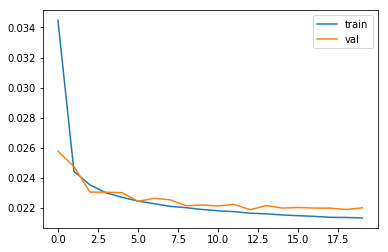

In [21]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
#plt.ylim(0.021, 0.024)

# テストする

In [0]:
pred = auto_encoder.predict(x_input_test)

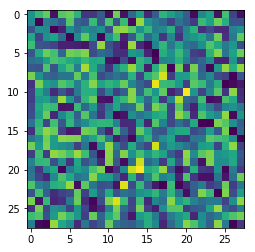

In [23]:
plt.imshow(x_input_test[0].squeeze())

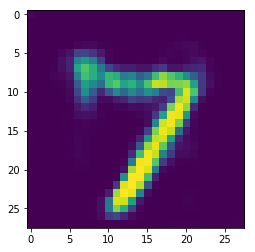

In [24]:
plt.imshow(pred[0].squeeze())

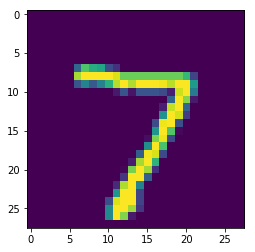

In [25]:
plt.imshow(x_output_test[0].squeeze())

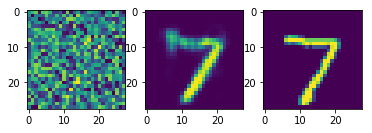

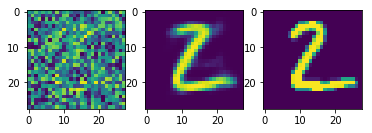

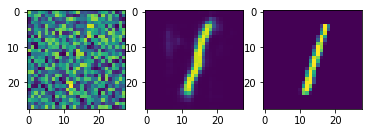

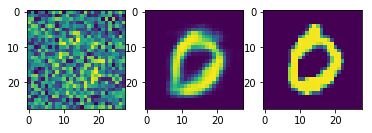

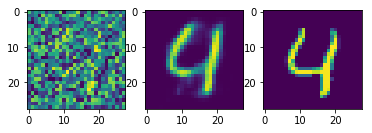

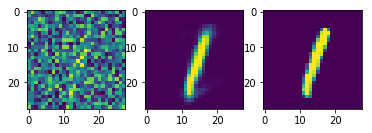

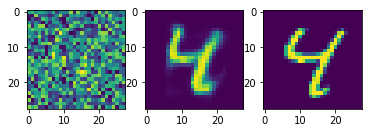

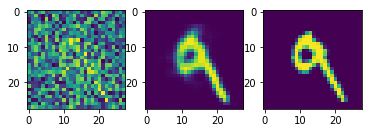

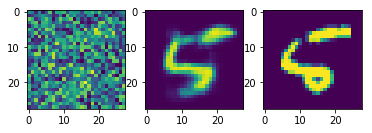

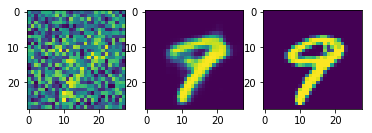

In [26]:
for x1,x2,x3 in zip(x_input_test[:10],pred[:10],x_output_test[:10]):
  plt.subplot(1,3,1)
  plt.imshow(x1.squeeze())
#  plt.clim(0,1)
  
  plt.subplot(1,3,2)
  plt.imshow(x2.squeeze())
  plt.clim(0,1)
  
  plt.subplot(1,3,3)
  plt.imshow(x3.squeeze())
  plt.clim(0,1)
  
  plt.show()
  